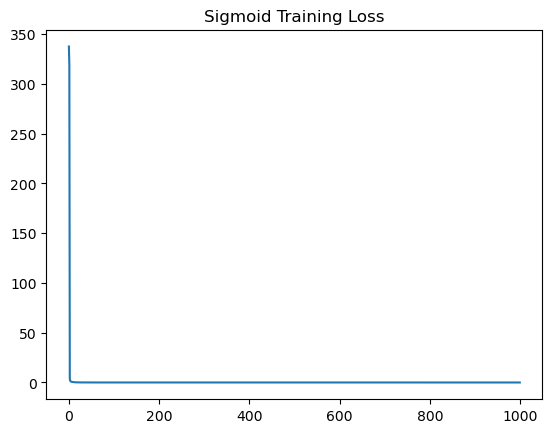

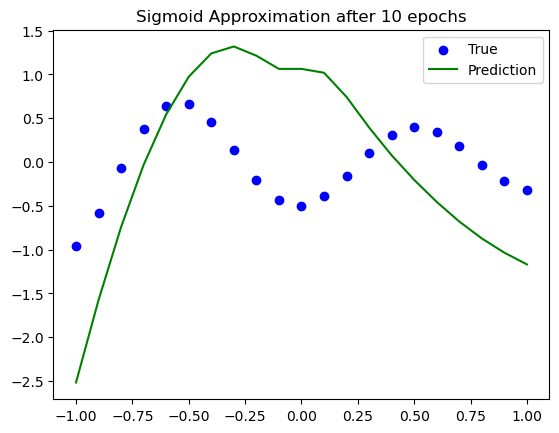

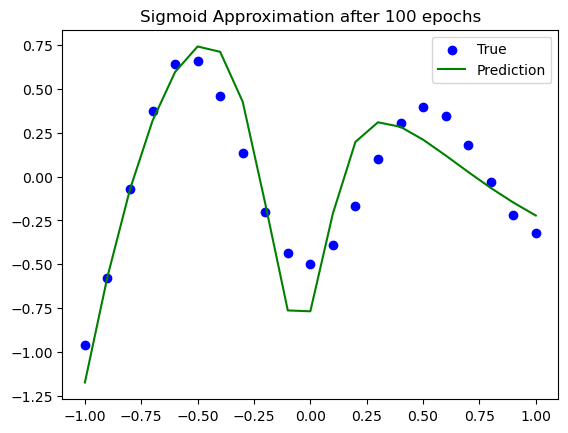

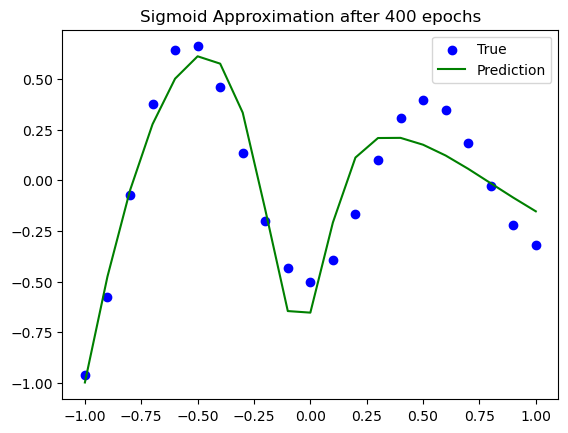

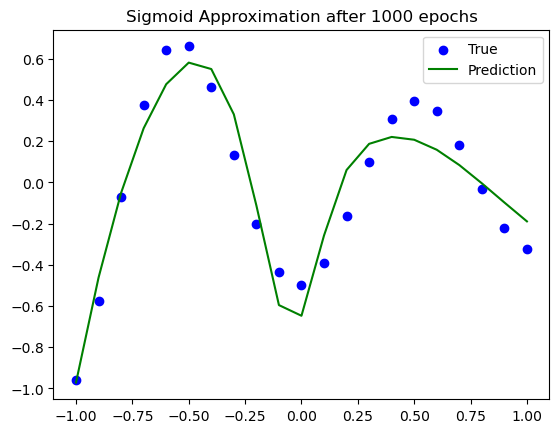

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_derivative(x): s=sigmoid(x); return s*(1-s)

# Dataset
X = np.linspace(-1, 1, 21).reshape(1,-1)
Y = np.array([[-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,
               -0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,
               0.396,0.345,0.182,-0.031,-0.219,-0.321]])
Y_min, Y_max = Y.min(), Y.max()
Y_scaled = (Y - Y_min)/(Y_max - Y_min)

def train_sigmoid(X, Y_scaled, H=15, lr=0.1, epochs=1000):
    np.random.seed(42)
    W1=np.random.randn(H,1)*np.sqrt(1/1)*6; b1=np.zeros((H,1))
    W2=np.random.randn(1,H)*6; b2=np.zeros((1,1))

    errors=[]
    snapshots={10:None,100:None,400:None,1000:None}

    for epoch in range(1,epochs+1):
        Z1=np.dot(W1,X)+b1; A1=sigmoid(Z1)
        Z2=np.dot(W2,A1)+b2; Y_pred=Z2

        loss=np.mean((Y_pred-Y_scaled)**2)
        errors.append(loss)

        dL=2*(Y_pred-Y_scaled)/X.shape[1]
        dW2=np.dot(dL,A1.T); db2=np.sum(dL,axis=1,keepdims=True)
        dA1=np.dot(W2.T,dL); dZ1=dA1*sigmoid_derivative(Z1)
        dW1=np.dot(dZ1,X.T); db1=np.sum(dZ1,axis=1,keepdims=True)

        W1-=lr*dW1; b1-=lr*db1
        W2-=lr*dW2; b2-=lr*db2

        if epoch in snapshots:
            snapshots[epoch]=(W1.copy(),b1.copy(),W2.copy(),b2.copy())

    return errors, snapshots

def forward_pass(X, params):
    W1,b1,W2,b2=params
    A1=sigmoid(np.dot(W1,X)+b1)
    Y_pred=np.dot(W2,A1)+b2
    return Y_pred*(Y_max-Y_min)+Y_min

# Train
errors,snapshots=train_sigmoid(X,Y_scaled)

plt.plot(errors);plt.title("Sigmoid Training Loss");plt.show()

for e,params in snapshots.items():
    if params is not None:
        Y_hat=forward_pass(X,params)
        plt.scatter(X.flatten(),Y.flatten(),c='blue',label='True')
        plt.plot(X.flatten(),Y_hat.flatten(),'g-',label='Prediction')
        plt.title(f"Sigmoid Approximation after {e} epochs")
        plt.legend();plt.show()


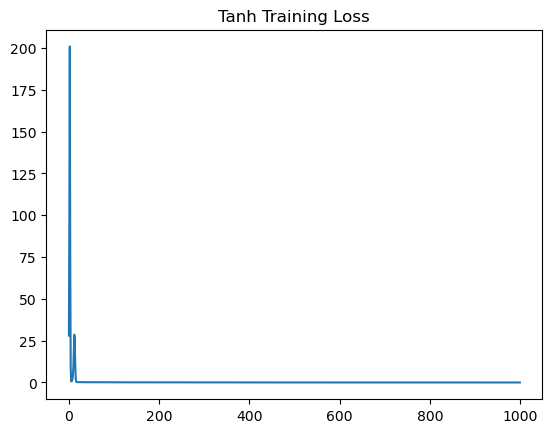

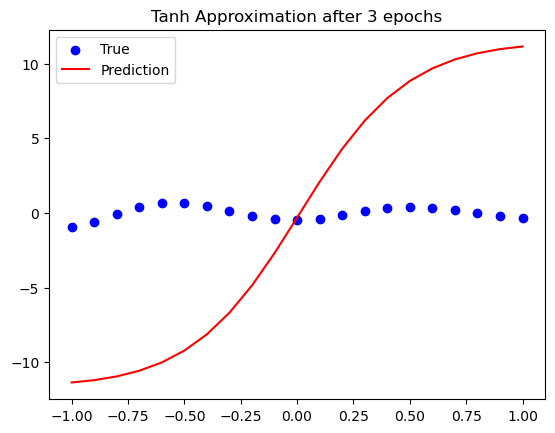

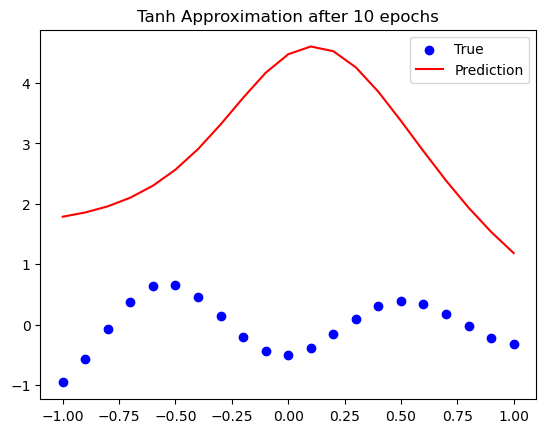

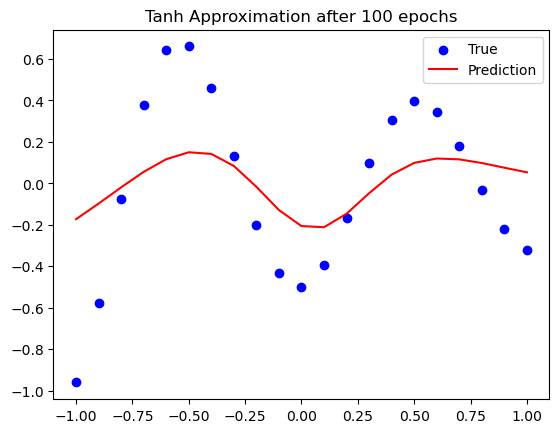

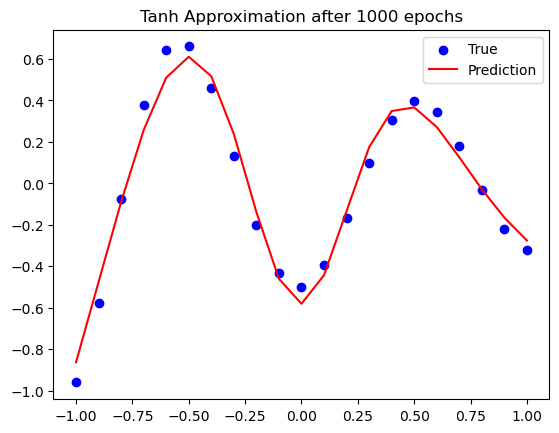

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x)**2

# Dataset
X = np.linspace(-1, 1, 21).reshape(1, -1)
Y = np.array([[-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,
               -0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,
               0.396,0.345,0.182,-0.031,-0.219,-0.321]])

def train_tanh(X, Y, H=35, lr=0.05, epochs=1000):
    np.random.seed(42)
    W1 = np.random.randn(H,1) * np.sqrt(1/1)
    b1 = np.zeros((H,1))
    W2 = np.random.randn(1,H) * 2
    b2 = np.zeros((1,1))

    errors = []
    snapshots = {3: None, 10: None, 100: None, 1000: None}

    for epoch in range(1, epochs+1):
        # Forward
        Z1 = np.dot(W1, X) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        Y_pred = Z2

        loss = np.mean((Y_pred - Y)**2)
        errors.append(loss)

        # Backward
        dL = 2*(Y_pred - Y)/X.shape[1]
        dW2 = np.dot(dL, A1.T)
        db2 = np.sum(dL, axis=1, keepdims=True)
        dA1 = np.dot(W2.T, dL)
        dZ1 = dA1 * tanh_derivative(Z1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)

        W1 -= lr*dW1; b1 -= lr*db1
        W2 -= lr*dW2; b2 -= lr*db2

        if epoch in snapshots:
            snapshots[epoch] = (W1.copy(), b1.copy(), W2.copy(), b2.copy())

    return errors, snapshots

def forward_pass(X, params):
    W1, b1, W2, b2 = params
    A1 = tanh(np.dot(W1, X) + b1)
    return np.dot(W2, A1) + b2

# Run training
errors, snapshots = train_tanh(X, Y)

plt.plot(errors); plt.title("Tanh Training Loss"); plt.show()

for e, params in snapshots.items():
    if params is not None:
        Y_hat = forward_pass(X, params)
        plt.scatter(X.flatten(), Y.flatten(), c='blue', label='True')
        plt.plot(X.flatten(), Y_hat.flatten(), 'r-', label='Prediction')
        plt.title(f"Tanh Approximation after {e} epochs")
        plt.legend(); plt.show()


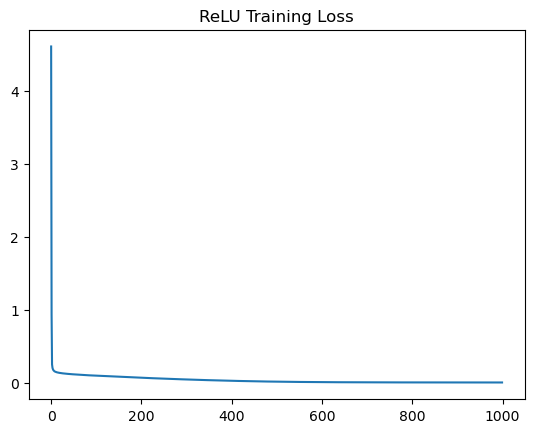

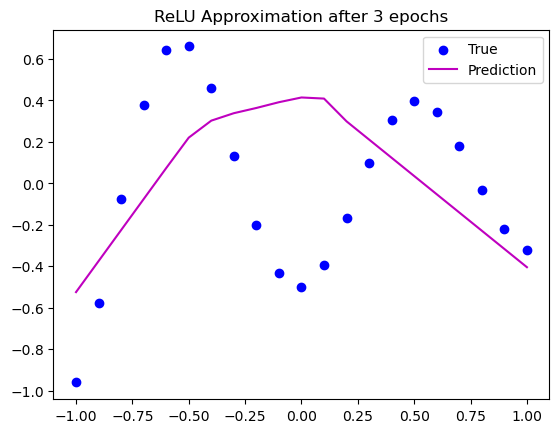

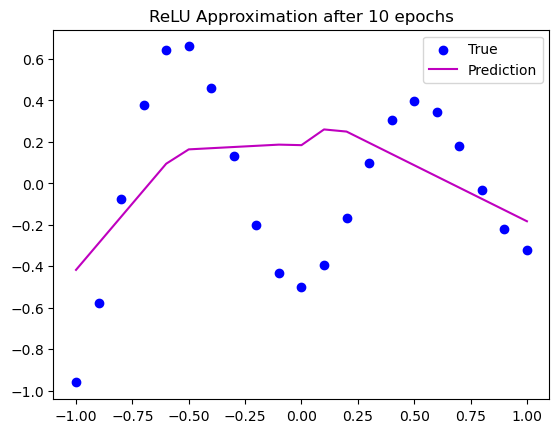

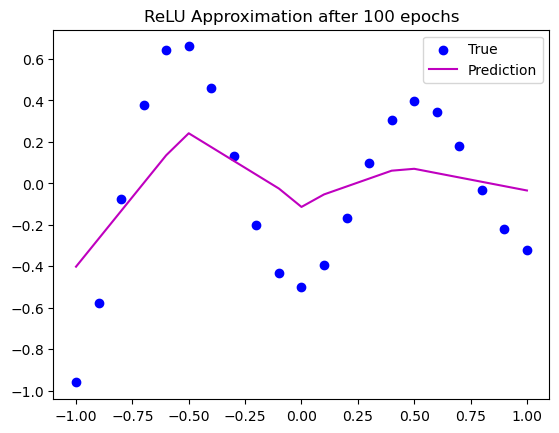

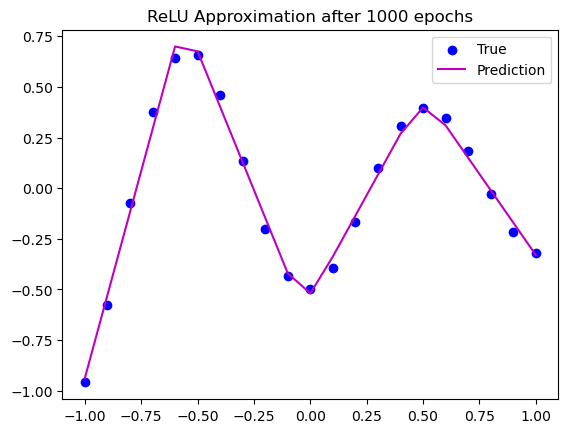

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x): return np.maximum(0,x)
def relu_derivative(x): return (x>0).astype(float)

# Dataset
X = np.linspace(-1, 1, 21).reshape(1,-1)
Y = np.array([[-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,
               -0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,
               0.396,0.345,0.182,-0.031,-0.219,-0.321]])

def train_relu(X,Y,H=15,lr=0.1,epochs=1000):
    np.random.seed(42)
    W1=np.random.randn(H,1)*np.sqrt(2/1); b1=np.zeros((H,1))
    W2=np.random.randn(1,H)*1; b2=np.zeros((1,1))

    errors=[]
    snapshots={3:None,10:None,100:None,1000:None}

    for epoch in range(1,epochs+1):
        Z1=np.dot(W1,X)+b1; A1=relu(Z1)
        Z2=np.dot(W2,A1)+b2; Y_pred=Z2

        loss=np.mean((Y_pred-Y)**2)
        errors.append(loss)

        dL=2*(Y_pred-Y)/X.shape[1]
        dW2=np.dot(dL,A1.T); db2=np.sum(dL,axis=1,keepdims=True)
        dA1=np.dot(W2.T,dL); dZ1=dA1*relu_derivative(Z1)
        dW1=np.dot(dZ1,X.T); db1=np.sum(dZ1,axis=1,keepdims=True)

        W1-=lr*dW1; b1-=lr*db1
        W2-=lr*dW2; b2-=lr*db2

        if epoch in snapshots:
            snapshots[epoch]=(W1.copy(),b1.copy(),W2.copy(),b2.copy())

    return errors,snapshots

def forward_pass(X,params):
    W1,b1,W2,b2=params
    A1=relu(np.dot(W1,X)+b1)
    return np.dot(W2,A1)+b2

# Train
errors,snapshots=train_relu(X,Y)

plt.plot(errors);plt.title("ReLU Training Loss");plt.show()

for e,params in snapshots.items():
    if params is not None:
        Y_hat=forward_pass(X,params)
        plt.scatter(X.flatten(),Y.flatten(),c='blue',label='True')
        plt.plot(X.flatten(),Y_hat.flatten(),'m-',label='Prediction')
        plt.title(f"ReLU Approximation after {e} epochs")
        plt.legend();plt.show()


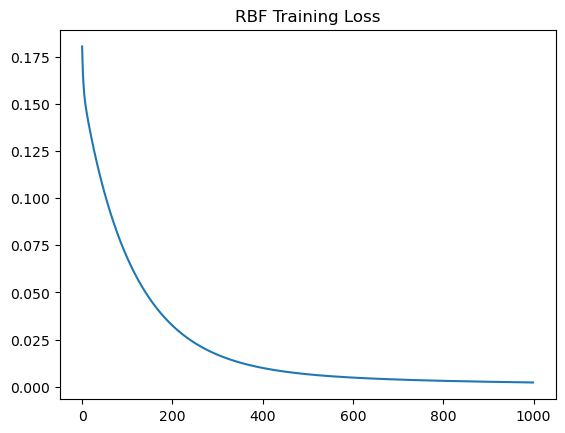

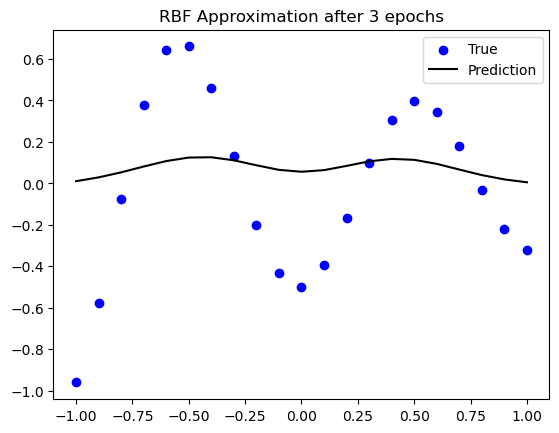

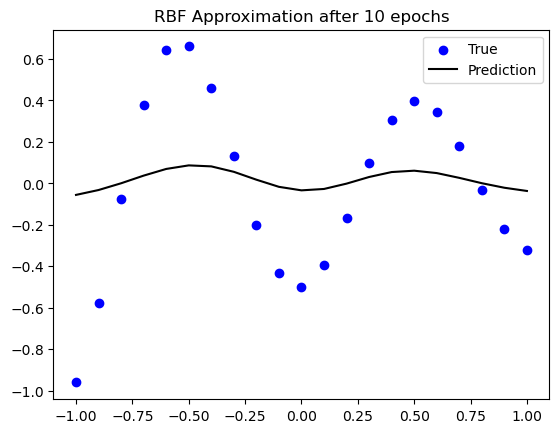

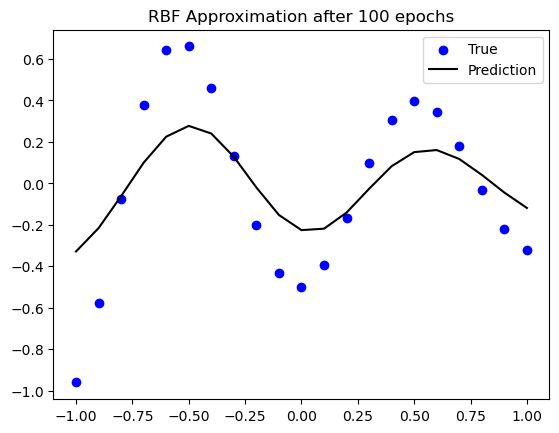

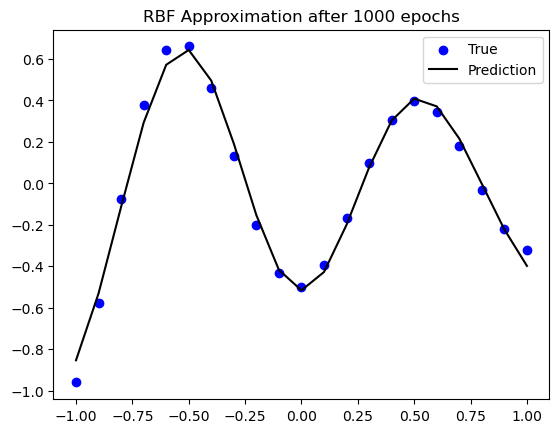

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x,centers,sigma=0.3):
    return np.exp(-((x-centers)**2)/(2*sigma**2))

# Dataset
X = np.linspace(-1, 1, 21).reshape(1,-1)
Y = np.array([[-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,
               -0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,
               0.396,0.345,0.182,-0.031,-0.219,-0.321]])

def train_rbf(X,Y,H=10,lr=0.05,epochs=1000):
    np.random.seed(42)
    centers=np.linspace(-1,1,H).reshape(H,1)
    A1=rbf(X,centers)
    W2=np.random.randn(1,H)*0.1; b2=np.zeros((1,1))

    errors=[]
    snapshots={3:None,10:None,100:None,1000:None}

    for epoch in range(1,epochs+1):
        Z2=np.dot(W2,A1)+b2; Y_pred=Z2
        loss=np.mean((Y_pred-Y)**2)
        errors.append(loss)

        dL=2*(Y_pred-Y)/X.shape[1]
        dW2=np.dot(dL,A1.T); db2=np.sum(dL,axis=1,keepdims=True)
        W2-=lr*dW2; b2-=lr*db2

        if epoch in snapshots:
            snapshots[epoch]=(centers.copy(),W2.copy(),b2.copy())

    return errors,snapshots

def forward_pass(X,params):
    centers,W2,b2=params
    A1=rbf(X,centers)
    return np.dot(W2,A1)+b2

# Train
errors,snapshots=train_rbf(X,Y)

plt.plot(errors);plt.title("RBF Training Loss");plt.show()

for e,params in snapshots.items():
    if params is not None:
        Y_hat=forward_pass(X,params)
        plt.scatter(X.flatten(),Y.flatten(),c='blue',label='True')
        plt.plot(X.flatten(),Y_hat.flatten(),'k-',label='Prediction')
        plt.title(f"RBF Approximation after {e} epochs")
        plt.legend();plt.show()
